<a href="https://colab.research.google.com/github/sonjoy1s/ML/blob/main/Mobile_Price_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [186]:
df = pd.read_csv("/content/train.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [187]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [189]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [190]:
df.isna().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


In [191]:
#!pip install ydata-profiling

In [192]:
#from ydata_profiling import ProfileReport

#profile = ProfileReport( df , title="Mobile Price Classification", explorative = True  )

#profile.to_file("mobile_price.html")

In [193]:
df.head(2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2


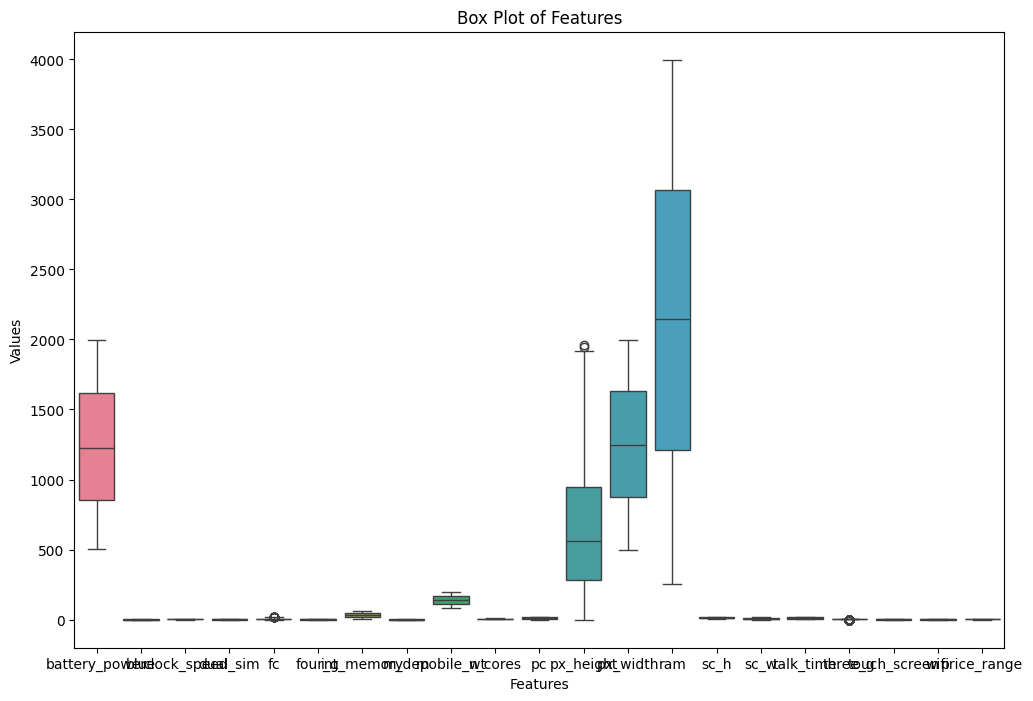

In [227]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df)
plt.xlabel("Features")
plt.ylabel("Values")
plt.title("Box Plot of Features")
plt.show()

<Axes: xlabel='price_range', ylabel='count'>

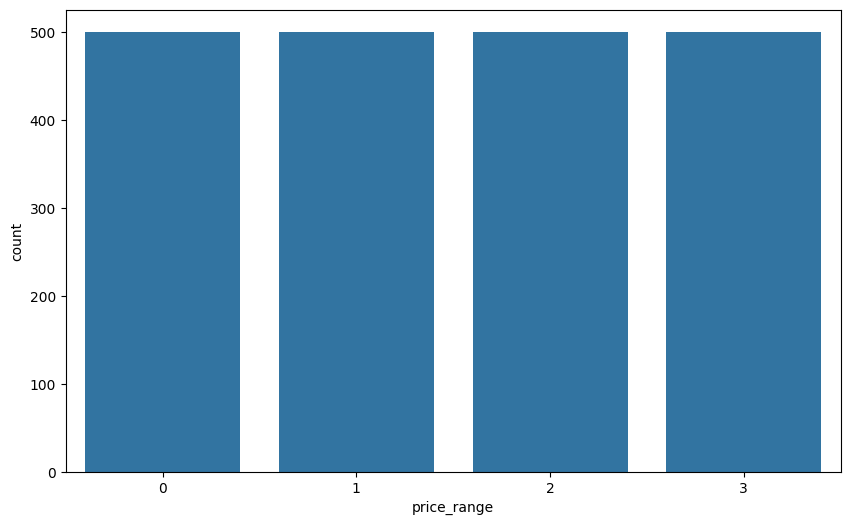

In [224]:
plt.figure(figsize=(10,6))
sns.countplot(x='price_range',data=df)

In [194]:
X = df.drop('price_range',axis=1)
y = df['price_range']

In [195]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42,stratify=y)

In [196]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
num_pipe = Pipeline(
    [
        ('imputer', SimpleImputer(strategy='median')),
        ('std_scaler', StandardScaler())
    ]
)

In [197]:
# base learner
lgr = LogisticRegression()
knn = KNeighborsClassifier()
rf_clf = RandomForestClassifier(random_state=42)
gb_clf = GradientBoostingClassifier(random_state=42)
xgb_clf = XGBClassifier(random_state=42)
svc_cls = SVC(random_state=42)


In [198]:
#voting regressor

voting_cls = VotingClassifier(
    estimators=[
        ('rf', rf_clf),#randomforest
        ('gb', gb_clf), # Gradientboosting
        ('xgb', xgb_clf) # Xgbclassifier
    ]
)

In [199]:
#stacking
stacking_cls = StackingClassifier(
    estimators=[
     ('lgr', lgr),
    ('rf', rf_clf),
    ('gb', gb_clf),
    ('xgb', xgb_clf)
])

In [200]:
model_train = {
    'Logistic Regression': lgr,
    'KNN': knn,
    'Random Forest': rf_clf,
    'Gradient Boosting': gb_clf,
    'XGBoost': xgb_clf,
    'SVC': svc_cls,
    'Voting Classifier': voting_cls,
    'Stacking Classifier': stacking_cls

}

In [201]:
results = []
for name, model in model_train.items():
  pipe = Pipeline(
      [
          ('numercal_pipe',num_pipe),
          ('model',model)
      ]
  )

  pipe.fit(X_train,y_train)

  y_pred = pipe.predict(X_test)

  accuracy = accuracy_score(y_test,y_pred)
  cls_rep = classification_report(y_test,y_pred)
  cnf_mat = confusion_matrix(y_test,y_pred)
  results.append(
      {
          'Model Name': name,
          'Accuracy': accuracy,
          'Classification Report': cls_rep,
          'Confusion Matrix': cnf_mat
      }
  )

  result_df = pd.DataFrame(results).sort_values("Accuracy", ascending=False)
print(result_df)



            Model Name  Accuracy  \
0  Logistic Regression     0.964   
7  Stacking Classifier     0.964   
4              XGBoost     0.924   
6    Voting Classifier     0.920   
3    Gradient Boosting     0.912   
2        Random Forest     0.874   
5                  SVC     0.866   
1                  KNN     0.476   

                               Classification Report  \
0                precision    recall  f1-score   ...   
7                precision    recall  f1-score   ...   
4                precision    recall  f1-score   ...   
6                precision    recall  f1-score   ...   
3                precision    recall  f1-score   ...   
2                precision    recall  f1-score   ...   
5                precision    recall  f1-score   ...   
1                precision    recall  f1-score   ...   

                                    Confusion Matrix  
0  [[120, 5, 0, 0], [1, 120, 4, 0], [0, 2, 119, 4...  
7  [[121, 4, 0, 0], [1, 119, 5, 0], [0, 2, 120, 3...  
4  [[

Final Accuracy: 0.964


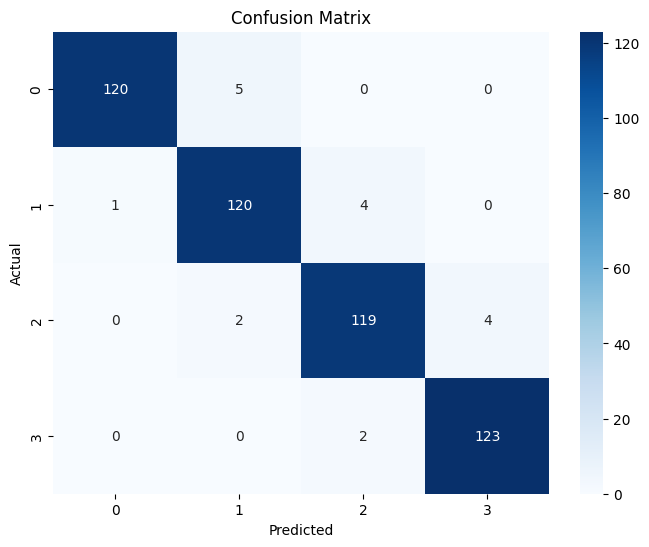

In [202]:
best_model = result_df.iloc[0]['Model Name']
best_model_obj = model_train[best_model]

final_pipe = Pipeline(
    [
        ('preprocessor',num_pipe),
        ('model',best_model_obj)
    ]
)

final_pipe.fit(X_train,y_train)
y_final_pred = final_pipe.predict(X_test)
print("Final Accuracy:", accuracy_score(y_test, y_final_pred))

cm = confusion_matrix(y_test, y_final_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [203]:
# cross validation
from sklearn.model_selection import cross_val_score
lg_pipe = Pipeline(
    [
        ('numercal_pipe',num_pipe),
        ('model',LogisticRegression(max_iter=500,multi_class='multinomial'))
    ]
)

In [204]:
cross_val = cross_val_score(lg_pipe,X_train,y_train,cv=5,scoring='accuracy')
print(cross_val)

[0.91666667 0.95333333 0.93666667 0.96333333 0.94      ]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

In [205]:
print(cross_val.mean())

0.942


In [206]:
print(cross_val.std())

0.01586050300449379


In [207]:
cross_val_f1 = cross_val_score(lg_pipe, X_train, y_train, cv=5, scoring='f1_macro')
print("5-Fold CV F1 (macro):", cross_val_f1)
print("Mean F1:", cross_val_f1.mean())


5-Fold CV F1 (macro): [0.91562948 0.95290212 0.93680664 0.96339527 0.94003912]
Mean F1: 0.9417545262593503


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

In [208]:
# stacking pipe
stg_pipe = Pipeline(
    [
        ('numercal_pipe',num_pipe),
        ('model',stacking_cls)
    ]
)

In [209]:
cross_val_stg = cross_val_score(stg_pipe,X_train,y_train,cv=5,scoring='accuracy')
print(cross_val_stg)

[0.91666667 0.95333333 0.94666667 0.96666667 0.94333333]


In [210]:
print(cross_val_stg.mean())

0.9453333333333334


In [211]:
print(cross_val_stg.std())

0.016411378166788247


In [212]:
lrg_pipe = Pipeline(
    [
        ('preprocessor',num_pipe),
        ('model',LogisticRegression(max_iter=500,multi_class='multinomial'))

    ]
)

In [213]:
param_grid = {'model__solver': ['lbfgs', 'saga'],
              'model__penalty': ['l2'],
              'model__C': [0.01,0.1,1,10,100],
              'model__max_iter': [1000,5000]
              }

In [214]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(
    estimator=lrg_pipe,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

In [215]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        Pipeline(steps=[('imputer',
                                                         SimpleImputer(strategy='median')),
                                                        ('std_scaler',
                                                         StandardScaler())])),
                                       ('model',
                                        LogisticRegression(max_iter=500,
                                                           multi_class='multinomial'))]),
             n_jobs=-1,
             param_grid={'model__C': [0.01, 0.1, 1, 10, 100],
                         'model__max_iter': [1000, 5000],
                         'model__penalty': ['l2'],
                         'model__solver': ['lbfgs', 'saga']},
             scoring='accuracy', verbose=1)

In [216]:
print("Best Parameters Found:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

Best Parameters Found: {'model__C': 10, 'model__max_iter': 1000, 'model__penalty': 'l2', 'model__solver': 'saga'}
Best CV Accuracy: 0.9633333333333333


In [217]:
best_lr_model = grid_search.best_estimator_

In [218]:
y_pred = best_lr_model.predict(X_test)
print("Final Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Final Test Accuracy: 0.974
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       125
           1       0.96      0.97      0.96       125
           2       0.96      0.98      0.97       125
           3       0.98      0.98      0.98       125

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500



In [219]:
!pip install mlflow

In [221]:
import mlflow
import mlflow.sklearn
from sklearn.metrics import accuracy_score, classification_report

# Set experiment
mlflow.set_experiment("Mobile_Price_Prediction_LogisticRegression")

# Define parameters for LogisticRegression
my_params = {
    'C': 1.0,
    'penalty': 'l2',
    'solver': 'lbfgs',
    'max_iter': 5000,
    'multi_class': 'multinomial',
    'random_state': 42
}

# Create pipeline
simple_lr_pipe = Pipeline([
    ('preprocessor', num_pipe),
    ('model', LogisticRegression(**my_params))
])

# Start MLflow run
with mlflow.start_run(run_name="LogisticRegression_Run"):

    mlflow.log_params(my_params)
    mlflow.log_param("model_type", "LogisticRegression")

    # Train model
    simple_lr_pipe.fit(X_train, y_train)

    # Predictions
    y_train_pred = simple_lr_pipe.predict(X_train)
    y_test_pred = simple_lr_pipe.predict(X_test)

    # Evaluate
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    mlflow.log_metric("train_accuracy", train_acc)
    mlflow.log_metric("test_accuracy", test_acc)

    # Log model
    mlflow.sklearn.log_model(simple_lr_pipe, "logistic_regression_model")

    # Print results
    print("Train Accuracy:", train_acc)
    print("Test Accuracy:", test_acc)
    print("\nClassification Report:\n", classification_report(y_test, y_test_pred))


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
2026/01/17 14:20:08 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Train Accuracy: 0.9786666666666667
Test Accuracy: 0.964

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98       125
           1       0.94      0.96      0.95       125
           2       0.95      0.95      0.95       125
           3       0.97      0.98      0.98       125

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500



In [223]:
import pickle

filename = "mobile_price_lr_model.pkl"

with open(filename, "wb") as file:
    pickle.dump(best_lr_model, file)

print("Model saved successfully using pickle!")

Model saved successfully using pickle!
